In [1]:
import os
import random
from collections import defaultdict, Counter
from statistics import mode

import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import cm
import nilearn
from nilearn import datasets, plotting, image, surface
from nilearn.image import mean_img
import nibabel as nib



/home/nikita/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/nikita/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nikita/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecat

In [2]:
import general_notebook as gn


results = [gn.process_subjects(s) for s in gn.SUBJECT_IDS]

/home/nikita/.local/lib/python3.7/site-packages/tatsu/grammars.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import defaultdict, Mapping
/home/nikita/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nikita/.local/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kw

In [3]:
infos = []
for i, sid in enumerate(gn.SUBJECT_IDS):
    infos.append(results[i][0][sid])
df_all_spatial_images = pd.DataFrame(data=infos, index=gn.SUBJECT_IDS)
df_all_spatial_images.drop(columns=["destrieux_affines", 'primaries'])

,destrieux_sulci,destrieux_spatial_images
105923,{'L_Lat_Fis_ant_Horizont': Region(VBR= affine:...,{'L_Lat_Fis_ant_Horizont': <class 'nibabel.spa...
111514,{'L_Lat_Fis_ant_Horizont': Region(VBR= affine:...,{'L_Lat_Fis_ant_Horizont': <class 'nibabel.spa...


In [4]:
frames=[]
for d1, d2 in results:
    df_d2 = pd.DataFrame(d2)
    frames.append(df_d2)
    
df_all=pd.concat(frames)
df_all.index.names = ['number']
df_all

,subject,query,sulcus
number,,,
0,105923,Q_cingulate_datalog,L_S_suborbital
0,111514,Q_cingulate_datalog,No sulcus found


In [5]:
q_list = ['Q_cingulate_datalog']

In [ ]:
# q_list=['Q_inferior_temporal', 'Q_olfactory', 'Q_precentral', 'Q_superior_temporal', 'Q_postcentral', 
#         'Q_orbital_H_shaped', 'Q_occipitotemporal', 'Q_jensen', 'Q_inferior_frontal', 
#        'Q_intraparietal', 'Q_anterior_occipital', 'Q_subparietal', 'Q_superior_frontal', 'Q_callosomarginal',
#        'Q_superior_occipital', 'Q_collateral', 'Q_intralingual', 'Q_lateral_occipital', 'Q_middle_frontal',
#        'Q_superior_rostral', 'Q_cingulate', 'Q_paracingulate', 'Q_inferior_occipital', 'Q_anterior_parolfactory',
#        'Q_lunate', 'Q_cuneal', 'Q_frontomarginal', 'Q_hippocampal', 'Q_superior_parietal', 'Q_rhinal', 
#        'Q_temporopolar', 'Q_retrocalcarine', 'Q_paracentral', 'Q_angular', 'Q_inferior_rostral', 'Q_intralimbic']

In [ ]:
#df_frames=[]
#df_spatial_images = pd.read_pickle('NeuroLang_queries_info_LH')#('Df_destrieux_spatial_images_LH_24_sub')
#df_frames.append(df_spatial_images)
#df_all_spatial_images = pd.concat(df_frames)

### Plots on surface

In [11]:
df_all_spatial_images.iloc[0]['destrieux_spatial_images']['L_S_suborbital']

In [6]:
def plot_surface_map_of_individual_folds(subjects, q_list, 
                           queries_dict, subject_info_dict, 
                           query_name):
    list_of_fold_spatial_images=[] 
    for s in subjects:
        s_index = subjects.index(s)
        q_index = q_list.index(query_name)
        df_one_query = queries_dict[queries_dict['query'] == query_name]
        wanted_fold = df_one_query[df_one_query['subject'] == s].sulcus
        fold_results = wanted_fold.values[0]
        if 'No sulcus found' not in fold_results:
            if fold_results in subject_info_dict.iloc[s_index]['destrieux_spatial_images'].keys():
                list_of_fold_spatial_images.append(subject_info_dict.iloc[s_index]['destrieux_spatial_images'][fold_results])
            else:
                pass
        else:
            pass
        
        for x in list_of_fold_spatial_images:
            plotting.surf_plotting.plot_surf(x, title=f'{s}, {query_name} result')

In [7]:
def plot_surf_prob_map(subjects, q_list, queries_dict, subject_info_dict, 
                                   primary_sulcus_name, query_name,
                                   plane='lateral',
                                   save_as=None,
                                   interactive=False):
    list_of_fold_spatial_images=[] 
    for s in subjects:
        s_index = subjects.index(s)
        if primary_sulcus_name != None:
            list_of_fold_spatial_images.append(subject_info_dict.iloc[s_index]['destrieux_spatial_images'][primary_sulcus_name])
        if query_name != None:
            q_index = q_list.index(query_name)
            df_one_query = queries_dict[queries_dict['query'] == query_name]
            wanted_fold = df_one_query[df_one_query['subject'] == s].sulcus
            fold_results = wanted_fold.values[0]
            if 'No sulcus found' not in fold_results:
                if fold_results in subject_info_dict.iloc[s_index]['destrieux_spatial_images'].keys():
                    list_of_fold_spatial_images.append(subject_info_dict.iloc[s_index]['destrieux_spatial_images'][fold_results])
                else:
                    pass
            else:
                pass
        
    mean_spatial_img = mean_img(list_of_fold_spatial_images)
    spatial_surf_from_vol = nilearn.surface.vol_to_surf(mean_spatial_img, '107321.L.inflated.32k_fs_LR.surf.gii')

    if not interactive:
        if primary_sulcus_name != None:   
            return plotting.plot_surf_stat_map(
                        '107321.L.very_inflated.32k_fs_LR.surf.gii', 
                        spatial_surf_from_vol, 
                        bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
                        threshold=0.1,
                        cmap='viridis',
                        vmax=1,
                        title=f'{primary_sulcus_name}',
                        darkness=0.75,
                        output_file=save_as,
                        view=plane)
        if query_name != None:
            return plotting.plot_surf_stat_map(
                        '107321.L.very_inflated.32k_fs_LR.surf.gii', 
                        spatial_surf_from_vol, 
                        bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
                        threshold=0.1,
                        cmap='viridis',
                        vmax=1,
                        title=f'{query_name}',
                        darkness=0.75,
                        output_file=save_as,
                        view=plane)
    else: 
        return plotting.view_surf(
                    '107321.L.very_inflated.32k_fs_LR.surf.gii', 
                    spatial_surf_from_vol, 
                    bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
                    threshold=0.01,
                    cmap='viridis',
                    vmin=0,
                    vmax=1,
                    symmetric_cmap=False)

In [8]:
surface_each_subject_query_result = plot_surface_map_of_individual_folds(gn.SUBJECT_IDS,
                                                                      q_list,
                                                                      df_all,
                                                                      df_all_spatial_images,
                                                                      query_name='Q_cingulate_datalog')

ValueError: The input type is not recognized. Valid inputs are one of the following file formats: .gii, .gii.gz, Freesurfer specific files such as .orig, .pial, .sphere, .white, .inflated or a list containing two Numpy arrays [vertex coordinates, face indices]

In [ ]:
df_one_query = df_all[df_all['query']=='Q_cingulate_datalog']
wanted_fold = df_one_query['105923']==int()

In [ ]:
%debug

In [14]:
surface_probability_map = plot_surf_prob_map(subject_ids,
                                          q_list,
                                          df_all,
                                          df_all_spatial_images,
                                          primary_sulcus_name = 'L_S_parieto_occipital',
                                          query_name=None,
                                          plane='medial')

NameError: name 'subject_ids' is not defined

### Plots in volume

In [31]:
def plot_all_folds_per_subject(subjects, 
                           queries_dict,
                           subject_info_dict, 
                           dimension='ortho',
                           cut_coords=None,
                           save_as=None):
    list_of_fold_spatial_images=[] 
    for x, s in enumerate(subjects):
        #subject_path = f'/home/amachlou/mindboggle/Subjects/{s}/'
        #orig_file=subject_path + 'mri/orig.mgz'
        for k in subject_info_dict.iloc[x]['destrieux_spatial_images'].keys():
            list_of_fold_spatial_images.append(subject_info_dict.iloc[x]['destrieux_spatial_images'][k])
        mean_spatial_img = mean_img(list_of_fold_spatial_images)
        plotting.plot_stat_map(
            mean_spatial_img, 
            #bg_img=orig_file,
            display_mode=dimension,
            cut_coords=cut_coords,
            threshold=0,
            colorbar=False,
            cmap='Set3',
            draw_cross=False,
            vmax=0.0005,
            title=f'{s} left',
            output_file=save_as)

In [47]:
def plot_individual_fold_per_subject(subjects, 
                           q_list,
                           queries_dict,
                           subject_info_dict, 
                           primary_sulcus_name, 
                           query_name,
                           dimension='ortho',
                           cut_coords=None,
                           save_as=None):
    for x, s in enumerate(subjects):
        #subject_path = f'/home/amachlou/mindboggle/Subjects/{s}/'
        #orig_file=subject_path + 'mri/orig.mgz'
        if primary_sulcus_name != None:
            plotting.plot_roi(
                subject_info_dict.iloc[x]['destrieux_spatial_images'][primary_sulcus_name],
                #bg_img=orig_file,
                display_mode=dimension,
                cut_coords=cut_coords,
                threshold=0.1,
                colorbar=False,
                cmap='cool',
                draw_cross=False,
                vmax=1,
                title=f'{s}, Left {primary_sulcus_name}',
                output_file=save_as)
        if query_name != None:
            q_index = q_list.index(query_name)
            df_one_query = queries_dict[queries_dict['query'] == query_name]
            wanted_fold = df_one_query[df_one_query['subject'] == s].sulcus
            fold_results = wanted_fold.values[0]
            if 'No sulcus found' not in fold_results:
                if fold_results in subject_info_dict.iloc[x]['destrieux_spatial_images'].keys():
                    plotting.plot_roi(
                        subject_info_dict.iloc[x]['destrieux_spatial_images'][fold_results], 
                        #bg_img=orig_file,
                        display_mode=dimension,
                        cut_coords=cut_coords,
                        threshold=0.1,
                        colorbar=False,
                        cmap='cool',
                        draw_cross=False,
                        vmax=1,
                        title=f'{s}, Left {query_name}, Destrieux sulcus={fold_results}',
                        output_file=save_as)
                else:
                    pass
            else:
                pass
        else:
            pass

In [38]:
def plot_stat_map_of_folds(subjects, 
                           q_list,
                           queries_dict,
                           subject_info_dict, 
                           primary_sulcus_name, 
                           query_name,
                           dimension='ortho',
                           cut_coords=None,
                           save_as=None,
                           interactive=False):
    list_of_fold_spatial_images=[] 
    for x, s in enumerate(subjects):
        if primary_sulcus_name != None:
            list_of_fold_spatial_images.append(subject_info_dict.iloc[x]['destrieux_spatial_images'][primary_sulcus_name])
        if query_name != None:
            q_index = q_list.index(query_name)
            df_one_query = queries_dict[queries_dict['query'] == query_name]
            wanted_fold = df_one_query[df_one_query['subject'] == s].sulcus
            fold_results = wanted_fold.values[0]
            if 'No sulcus found' not in fold_results:
                if fold_results in subject_info_dict.iloc[x]['destrieux_spatial_images'].keys():
                    list_of_fold_spatial_images.append(subject_info_dict.iloc[x]['destrieux_spatial_images'][fold_results])
                else:
                    pass
            else:
                pass
        else:
            pass
    mean_spatial_img = mean_img(list_of_fold_spatial_images)
    print('Value of voxel with maximum overlap: ', mean_spatial_img.dataobj.max())
    proportion = round(len(list_of_fold_spatial_images)/len(subjects),2)
    if not interactive:
        return plotting.plot_stat_map(
                    mean_spatial_img, 
                    display_mode=dimension,
                    cut_coords=cut_coords,
                    threshold=0.1,
                    colorbar=True,
                    cmap='tab10',
                    draw_cross=False,
                    vmax=1,
                    title=f'Results found in {len(list_of_fold_spatial_images)} / {len(subjects)} subjects, proportion={proportion}',
                    output_file=save_as)
    else: 
        return plotting.view_img(
                    mean_spatial_img, 
                    threshold=0.01,
                    cmap='viridis',
                    vmin=0,
                    vmax=1,
                    title=f'{primary_sulcus_name}, {len(list_of_fold_spatial_images)} / {len(subjects)} subjects',
                    symmetric_cmap=False)

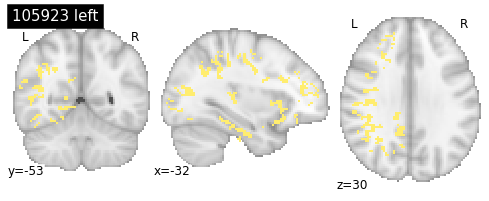

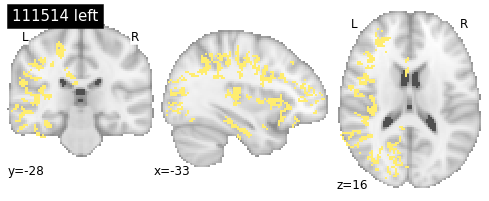

In [39]:
each_subject_all_folds = plot_all_folds_per_subject(gn.SUBJECT_IDS[:2], 
                                                    df_all,
                                                    df_all_spatial_images)

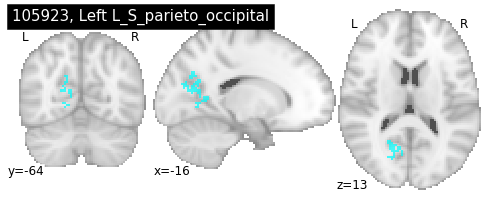

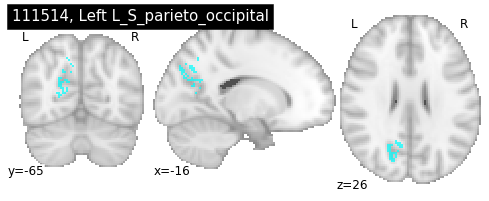

In [40]:
each_subject_destrieux_sulcus = plot_individual_fold_per_subject(gn.SUBJECT_IDS[:2], 
                                                    q_list,
                                                    df_all,
                                                    df_all_spatial_images,
                                                    primary_sulcus_name='L_S_parieto_occipital',
                                                    query_name=None)

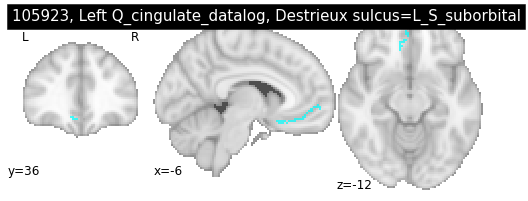

In [48]:
each_subject_query_result = plot_individual_fold_per_subject(gn.SUBJECT_IDS[:2], 
                                                    q_list,
                                                    df_all,
                                                    df_all_spatial_images,
                                                    primary_sulcus_name=None,
                                                    query_name='Q_cingulate_datalog')

Value of voxel with maximum overlap:  1.0


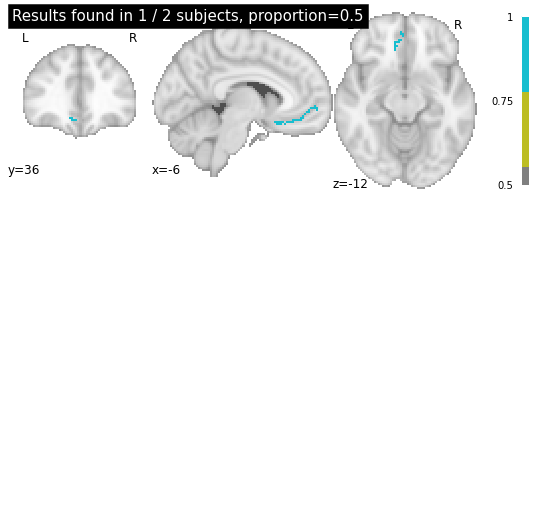

In [46]:
query_prob_map = plot_stat_map_of_folds(gn.SUBJECT_IDS, 
                                                    q_list,
                                                    df_all,
                                                    df_all_spatial_images,
                                                    primary_sulcus_name=None,#'L_S_parieto_occipital',
                                                    query_name='Q_cingulate_datalog')

In [13]:
def plot_individual_multiple_folds(
   subjects, 
   q_list,
   queries_dict,
   subject_info_dict, 
   primary_sulcus_name, 
   query_name,
   dimension,
   save_as
):
    list_of_fold_spatial_images=[] 
    for s in subjects:
        x = subject_ids.index(s)
        q_index = q_list.index(query_name)
        df_one_query = queries_dict[queries_dict['query'] == query_name]
        wanted_fold = df_one_query[df_one_query['subject'] == s].sulcus
        fold_results = wanted_fold.values[0]
        if 'No sulcus found' not in fold_results:
            if fold_results in subject_info_dict.iloc[x]['destrieux_spatial_images'].keys():
                list_of_fold_spatial_images.append(subject_info_dict.iloc[x]['destrieux_spatial_images'][fold_results])
            else:
                pass              
        else:
            pass
        mean_spatial_img = mean_img(list_of_fold_spatial_images)
        plotting.plot_stat_map(
            mean_spatial_img, 
            display_mode=dimension,
            cut_coords=[-7, -8, -9, -10, -11],
            threshold=0,
            colorbar=False,
            cmap='tab20b',
            draw_cross=False,
            vmax=0.0005,
            title=f'{s} Left {query_name} without secondary query',
            output_file=save_as)
